In [ ]:
'''
Linear Regression:

Definition:
It is a supervised learning algorithm used for predicting a continuous target variable based on one or more input variables(features). 
It assumes a linear relationship between the input features and the output.

Example:
PRedicting the price of a house based on its size, number of bedrooms, and location.

Mathematical Representation:
y = β0 + β1*x1 + β2*x2 + ... + βn*xn + ε

Where:
- y is the predicted value (target variable)
- β0 is the y-intercept (bias term)
- β1, β2, ..., βn are the coefficients (weights) for each feature
- x1, x2, ..., xn are the input features

or,
h(x) = θ0 + θ1*x1 + θ2*x2 + ... + θn*xn
where:
- h(x) is the predicted value
- θ0 is the y-intercept (bias term)
- θ1, θ2, ..., θn are the coefficients (weights) for each feature
- x1, x2, ..., xn are the input features

or h(x) = w*x + b
where:
- h(x) is the predicted value
- w is the weight vector (coefficients)
- b is the bias term
- x is the input feature vector
'''

In [ ]:
'''
2 Types of Linear Regression:
1. Simple Linear Regression:
   - Involves one input feature (x) and one output variable (y).
   - The relationship is modeled as a straight line.
   - Example: Predicting the price of a car based on its age.   
2. Multiple Linear Regression:
   - Involves multiple input features (x1, x2, ..., xn) and
    one output variable (y).
    - The relationship is modeled as a hyperplane in higher dimensions.

    
'''

In [ ]:
'''
Simple Linear Regression:

Equation:
y = β0 + β1*x + ε
Where:
- y is the predicted value (target variable)
- β0 is the y-intercept (bias term)
- β1 is the coefficient (weight) for the feature x
- x is the input feature

or the prediction function can be represented as:
hθ(x) = θ0 + θ1*x

where:
- hθ(x) is the predicted value
- θ0 is the y-intercept (bias term)
- θ1 is the coefficient (weight) for the feature x or slope
Example:
Predicting the price of a car based on its age.

'''

In [ ]:
'''
Multiple Linear Regression:
Equation:
h(x) = θ0 + θ1*x1 + θ2*x2 + ... + θn*xn
or h(θ) = θ^T * x

Where:
- h(x) is the predicted value (target variable)
- θ0 is the y-intercept (bias term)
- θ1, θ2, ..., θn are the coefficients (weights) for each feature
- x1, x2, ..., xn are the input features
- θ^T is the transpose of the parameter vector θ or dot product of θ and x
and θ is parameter vector containing the coefficients (weights) and bias term
and x in this case is a vector of input features.

Example:
Predicting the price of a house based on its size, number of bedrooms, and location.
'''

In [ ]:
'''
Cost Function:
The cost function for linear regression is used to measure how well the model's predictions match the actual target values.

J(θ) = (1/2m) * Σ(h(x_i) - y_i)^2
where:
- J(θ) is the cost function
- m is the number of data points (training examples)
- h(x_i) is the predicted value for the i-th example
- y_i is the actual target value for the i-th example

The most common cost function used is the Mean Squared Error (MSE), which is defined as:
MSE = (1/n) * Σ(y_i - h(x_i))^2
where:
- n is the number of training examples 
- y_i is the actual target value for the i-th example
- h(x_i) is the predicted value for the i-th example
- Σ denotes the summation over all training examples
The goal of linear regression is to minimize the cost function by adjusting the model parameters (weights and bias).


'''

Final parameters (weights): [0.11071521 0.95129619]


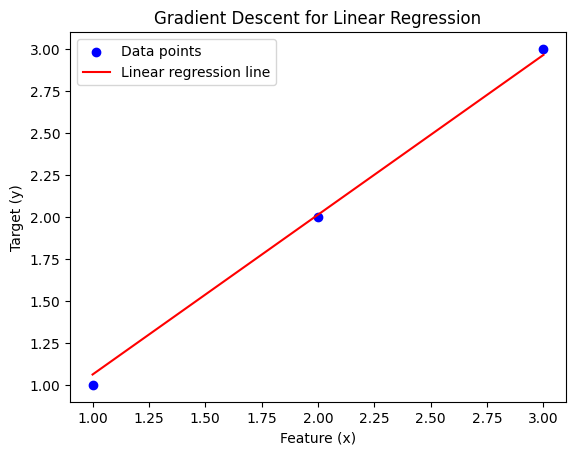

In [ ]:
'''
Descent Gradient:
The gradient descent algorithm is used to minimize the cost function in linear regression by iteratively 
updating the model parameters (weights and bias).
The update rule for gradient descent is as follows:
θ_j := θ_j - α * (1/m) * Σ(h(x_i) - y_i) * x_i
where:
- θ_j is the j-th parameter (weight or bias)
- α is the learning rate (step size)
- m is the number of training examples
- h(x_i) is the predicted value for the i-th example
- y_i is the actual target value for the i-th example
- x_i is the input feature for the i-th example
- Σ denotes the summation over all training examples
'''
# Descent Gradient:
import numpy as np
def gradient_descent(X, y, theta, alpha, num_iterations):
    m = len(y)  # number of training examples
    for _ in range(num_iterations):
        predictions = X.dot(theta)  # h(x) = X * theta
        errors = predictions - y  # h(x) - y
        gradient = (1/m) * X.T.dot(errors)  # (1/m) * X^T * (h(x) - y)
        theta -= alpha * gradient  # θ := θ - α * gradient
    return theta
# Example usage:
X = np.array([[1, 1], [1, 2], [1, 3]])  # Input features (with bias term)
y = np.array([1, 2, 3])  # Target variable
theta_initial = np.array([0, 0], dtype=float)  # Initial parameters (weights) as float
alpha = 0.01  # Learning rate
num_iterations = 1000  # Number of iterations for gradient descent
theta_final = gradient_descent(X, y, theta_initial, alpha, num_iterations)
print("Final parameters (weights):", theta_final)

# plotting the descent gradient
import matplotlib.pyplot as plt
def plot_gradient_descent(X, y, theta):
    plt.scatter(X[:, 1], y, color='blue', label='Data points')
    plt.plot(X[:, 1], X.dot(theta), color='red', label='Linear regression line')
    plt.xlabel('Feature (x)')
    plt.ylabel('Target (y)')
    plt.title('Gradient Descent for Linear Regression')
    plt.legend()
    plt.show()
# Example usage of plotting function
plot_gradient_descent(X, y, theta_final)


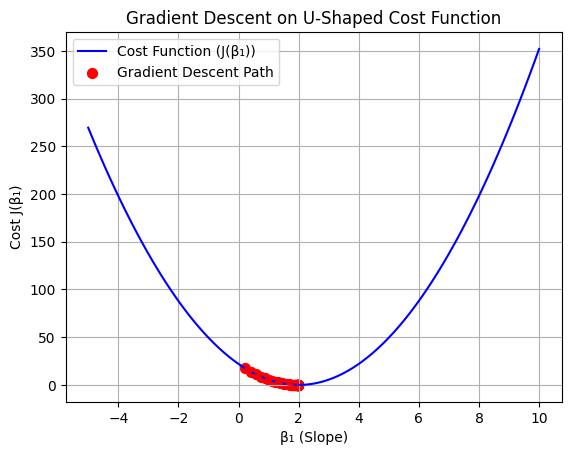

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data for simple linear regression
X = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 6, 8, 10])

# Cost function J(beta_1) for a fixed beta_0 (for simplicity)
def cost_function(beta_1, X, y, beta_0=0):
    m = len(X)
    y_pred = beta_0 + beta_1 * X
    return (1/(2*m)) * np.sum((y_pred - y)**2)

# Gradient descent
def gradient_descent(X, y, beta_0=0, beta_1=0, alpha=0.01, iterations=100):
    m = len(X)
    cost_history = []
    beta_1_history = []
    
    for _ in range(iterations):
        y_pred = beta_0 + beta_1 * X
        error = y_pred - y
        beta_1 -= alpha * (1/m) * np.sum(error * X)
        cost = cost_function(beta_1, X, y, beta_0)
        cost_history.append(cost)
        beta_1_history.append(beta_1)
    
    return beta_1_history, cost_history

# Run gradient descent
beta_1_history, cost_history = gradient_descent(X, y, alpha=0.01, iterations=50)

# Generate points for the U-shaped cost function curve
beta_1_range = np.linspace(-5, 10, 100)
costs = [cost_function(b, X, y) for b in beta_1_range]

# Plot
plt.plot(beta_1_range, costs, label='Cost Function (J(β₁))', color='blue')
plt.scatter(beta_1_history, cost_history, color='red', label='Gradient Descent Path', s=50)
plt.plot(beta_1_history, cost_history, color='red', linestyle='--')
plt.xlabel('β₁ (Slope)')
plt.ylabel('Cost J(β₁)')
plt.title('Gradient Descent on U-Shaped Cost Function')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
'''
Convergence Algorithm:
- Definition:
    The convergence algorithm for linear regression is the process of iteratively 
    adjusting the model parameters (weights and bias) to minimize the cost function until a stopping criterion is met.
    (weight is coefficient of the feature (slope)and bias is the y-intercept)
- The convergence algorithm for linear regression is typically implemented using gradient descent.
- The convergence is determined by checking if the change in the cost function 
    or the parameters is below a specified threshold or if a maximum number of iterations is reached.

Mathematically, this can be represented as in derivative form:
θ_j := θ_j - α * ∂J(θ)/∂θ_j
where:
- θ_j is the j-th parameter (weight or bias)
- α is the learning rate (step size)
- ∂J(θ)/∂θ_j is the partial derivative of the cost function with respect to the j-th parameter
- The algorithm iteratively updates the parameters until convergence is achieved.
 

Learning Rate (α):
- The learning rate is a crucial hyperparameter in the gradient descent algorithm.
- It need to be add or subtracted to the parameters during each iteration, when derivative is positive or negative respectively.
- It determines the size of the steps taken towards the minimum of the cost function during each iteration.
- If the learning rate is too small, convergence will be very slow.
- If the learning rate is too large, the algorithm may overshoot the minimum or even diverge, causing the cost function to increase instead of decrease.
- A proper learning rate ensures that the cost function decreases smoothly and the algorithm converges efficiently.
- It is common practice to experiment with different learning rates or use techniques like learning rate schedules or adaptive learning rates to achieve optimal convergence.


the algorithm stops when in sync with the convergence criteria :
- The change in the cost function is below a specified threshold (e.g., |J(θ_new) - J(θ_old)| < ε)
- The change in the parameters is below a specified threshold (e.g., ||θ_new - θ_old|| < ε)
- ε is a small positive number (tolerance level) 
- A maximum number of iterations is reached (e.g., num_iterations < max_iter)

- The algorithm also checks if the cost function is decreasing or not.
Also, we have to check if the cost function is decreasing or not, if it is not decreasing then have to stop the algorithm.
- If the cost function is not decreasing, indicates that the learning rate is too high or the model is not converging properly.


Step-by-Step Process mathematically:
1. Initialize the parameters (weights and bias) to random values or zeros.
2. For each iteration:
    - Compute the predicted values using the current parameters: h(x) = X * θ
    - Calculate the cost function: J(θ) = (1/2m) * Σ(h(x_i) - y_i)^2
    - Compute the gradients: ∂J(θ)/∂θ_j = (1/m) * Σ(h(x_i) - y_i) * x_i
    - Update the parameters: θ_j := θ_j - α * ∂J(θ)/∂θ_j (we have to add or subtract the learning rate to the parameters depending on the sign of the derivative)
    - Check for convergence criteria (change in cost function or parameters)


'''

In [ ]:
'''
Multiple Linear Regression:
Definition:
It is an extension of simple linear regression that involves multiple input features (x1, x2, ..., xn) to predict a continuous target variable (y).
It models the relationship between the input features and the output as a hyperplane in higher dimensions.
Equation:
h(x) = θ0 + θ1*x1 + θ2*x2 + ... + θn*xn
or h(θ) = θ^T * x
Where:
- h(x) is the predicted value (target variable)
- θ0 is the y-intercept (bias term)
- θ1, θ2, ..., θn are the coefficients (weights) for each feature or slope
- x1, x2, ..., xn are the input features
- θ^T is the transpose of the parameter vector θ or dot product of θ and x
and θ is parameter vector containing the coefficients (weights) and bias term
and x in this case is a vector of input features.
'''

In [ ]:
'''
Performance Metrics:
Definition:
Performance metrics are used to evaluate the performance of a linear regression model by 
measuring how well the model's predictions match the actual target values.
Common performance metrics for linear regression include:
1. Mean Squared Error (MSE):
   - Measures the average squared difference between predicted and actual values.
   - Formula: MSE = (1/n) * Σ(y_i - h(x_i))^2
   - Lower MSE indicates better model performance.

2. R-squared (R²):
   - Represents the proportion of variance in the target variable that is explained by the input features.
    - Formula: R² = 1 - (SS_res / SS_tot)
    - Where SS_res is the sum of squared residuals (errors) and SS_tot is the total sum of squares.
    - SS_res = Σ(y_i - h(x_i))^2
    - SS_tot = Σ(y_i - y_mean)^2, where y_mean is the mean of the actual target values.
    - R-squared values range from 0 to 1, with higher values indicating better model fit.

3. Adjusted R-squared:
    - Adjusts R-squared for the number of input features in the model.
    - Useful for comparing models with different numbers of features.
    - Formula: Adjusted R² = 1 - [(1 - R²) * (n - 1) / (n - p - 1)]
    - Where n is the number of data points and p is the number of input features.

4. Root Mean Squared Error (RMSE):
    - The square root of the mean squared error.
    - Formula: RMSE = sqrt(MSE)
    - Provides an interpretable measure of the average prediction error in the same units as the target variable.
'''

In [ ]:
'''
MSE, MSA & RMSE

MSE (Mean Squared Error):
- Definition: MSE is a performance metric that measures the average squared difference between predicted and actual values.
- Formula: MSE = (1/n) * Σ(y_i - h(x_i))^2
- Where:
- n is the number of training examples
- y_i is the actual target value for the i-th example
- h(x_i) is the predicted value for the i-th example
- Interpretation: Lower MSE indicates better model performance, as it means the predictions are closer to
the actual values. It is sensitive to outliers due to the squaring of errors.
MSE is commonly used in regression tasks to evaluate the accuracy of the model's predictions.

MSE impact on cost function:
- The cost function for linear regression is often defined as the MSE, which is minimized during the training process.
- The goal of the gradient descent algorithm is to find the parameters (weights and bias) that minimize the MSE.
- The MSE is calculated at each iteration of the gradient descent algorithm to monitor the convergence of the model.
- A lower MSE indicates that the model is learning and improving its predictions over iterations.

Advantages of MSE:
- Easy to Compute: MSE is straightforward to calculate and implement in practice.
- Differentiable: MSE is differentiable, which makes it suitable for optimization algorithms like gradient descent.
- Penalizes Large Errors: MSE penalizes larger errors more than smaller ones due to the squaring of the differences, which can be beneficial in certain scenarios.
- Provides a Single Value: MSE provides a single value that summarizes the overall performance of the model, making it easy to compare different models or configurations.
- Convergence: MSE is often used as the cost function in gradient descent algorithms, allowing for efficient convergence to optimal parameters.
- One global and local minimum: MSE has a single global minimum, which makes it easier to optimize compared to other metrics that may have multiple local minima.


Disadvantages of MSE:
- Sensitivity to Outliers: MSE is sensitive to outliers because it squares the errors, which can disproportionately affect the overall error metric.
- Non-Interpretable Units: MSE is in squared units of the target variable, making it less interpretable compared to other metrics like RMSE.
- Not Robust: MSE can be influenced by extreme values, leading to misleading conclusions about model performance.
- It is important to consider the context of the problem and the distribution of the data when using MSE as a performance metric.

MSA (Mean Squared Absolute Error):
- Definition: MSA is a performance metric that measures the average squared absolute difference between predicted and actual values.
- Formula: MSA = (1/n) * Σ|y_i - h(x_i)|^2
- Where:
- n is the number of training examples
- y_i is the actual target value for the i-th example
- h(x_i) is the predicted value for the i-th example
- Interpretation: MSA is similar to MSE but uses absolute differences instead of squared differences.
- It is less sensitive to outliers compared to MSE, as it does not square the errors.
- MSA is less commonly used than MSE but can be useful in certain scenarios where absolute differences are more relevant.

Advantages of MSA:
- Robust to Outliers: MSA is less sensitive to outliers compared to MSE, as it does not square the errors.
- Interpretable Units: MSA is in the same units as the target variable, making it easier to interpret compared to MSE.

Disadvantages of MSA:
- Non-Differentiable: MSA is not differentiable at zero, which can make it challenging to optimize using gradient-based methods.
- Convergence: MSA may not converge as smoothly as MSE in gradient descent algorithms due to its non-differentiable nature at zero.
- Less Common: MSA is less commonly used than MSE, which may limit its applicability

RMSE (Root Mean Squared Error):
- Definition: RMSE is a performance metric that measures the square root of the average squared difference
between predicted and actual values.
- Formula: RMSE = sqrt(MSE)
- Where MSE is the Mean Squared Error calculated as described above.
- Interpretation: RMSE provides an interpretable measure of the average prediction error in the same units as the target variable.
- It is commonly used in regression tasks to evaluate the accuracy of the model's predictions.
- RMSE is often preferred over MSE because it is in the same scale as the target variable, making it easier to interpret.

Advantages of RMSE:
- Interpretable Units: RMSE is in the same units as the target variable, making it easier to interpret compared to MSE.
- Penalizes Large Errors: RMSE penalizes larger errors more than smaller ones due to the squaring of the differences, similar to MSE.
- Differentiable: RMSE is differentiable, which makes it suitable for optimization algorithms like gradient descent.

disadvantages of RMSE:
- not robust to outliers: RMSE is sensitive to outliers because it squares the errors, which can disproportionately affect the overall error metric.
- Non-Linear: RMSE is a non-linear transformation of MSE, which can complicate the interpretation of the results.
'''

In [ ]:
'''
Training Dataset, Testing Dataset, Validation Dataset:
- Training Dataset:
    - The training dataset is used to train the linear regression model.
    - It contains input features (X) and corresponding target values (y).
    - The model learns the relationship between the input features and the target variable by adjusting the parameters (weights and bias) to minimize the cost function.
- Testing Dataset:
    - The testing dataset is used to evaluate the performance of the trained model.
    - It contains input features (X_test) and corresponding target values (y_test).
    - The model's predictions on the testing dataset are compared to the actual target values to assess its accuracy and generalization ability.    
- Validation Dataset:
    - The validation dataset is used to tune the hyperparameters of the model and prevent overfitting.
    - It contains input features (X_val) and corresponding target values (y_val).
- The model's performance on the validation dataset is monitored during training, and adjustments are made to the hyperparameters (e.g., learning rate, regularization) to improve the model's performance.
- The validation dataset helps in selecting the best model configuration before final evaluation on the testing dataset.
'''

In [ ]:
'''

Overfitting and Underfitting:

Overfitting:
- Definition: Overfitting occurs when a model learns the training data too well, capturing noise and outliers instead of the underlying pattern.
- Symptoms: The model performs well on the training dataset but poorly on the testing dataset, indicating that it has memorized the training data rather than generalizing to new data.
- Causes: Overfitting can occur when the model is too complex (e.g., too many features or high-degree polynomial regression) or when there is insufficient training data.
- Solutions: To prevent overfitting, techniques such as regularization (L1 or L2 regularization), cross-validation, and early stopping can be employed.

Underfitting:
- Definition: Underfitting occurs when a model is too simple to capture the underlying pattern in the data.
- Symptoms: The model performs poorly on both the training and testing datasets, indicating that it has not learned the relationship between the input features and the target variable.
- Causes: Underfitting can occur when the model is too simplistic (e.g., linear regression with few features) or when the training data is insufficient.
- Solutions: To address underfitting, the model can be made more complex by adding more features, increasing the degree of polynomial regression, or using more advanced algorithms.

In terms of Bias-Variance Tradeoff (table form):
| Aspect                | Overfitting                          | Underfitting                         |
|-----------------------|--------------------------------------|--------------------------------------|
| Bias                  | Low                                  | High                                 |
| Variance              | High                                 | Low                                  |
| Model Complexity      | Too complex                          | Too simple                           |
| Training Performance  | Excellent (low error)               | Poor (high error)                    |
| Testing Performance   | Poor (high error)                   | Poor (high error)                    |
- Solutions             | Regularization, Cross-validation    | Add features, Increase complexity    |

For Generalized model (Bias-Variance Tradeoff) table form:
| Aspect                | Generalized Model                    |
|-----------------------|--------------------------------------|
| Bias                  | Moderate                             |
| Variance              | Moderate                             |
| Model Complexity      | Balanced                             |
| Training Performance  | Good (low error)                     |
| Testing Performance   | Good (low error)                     |

'''

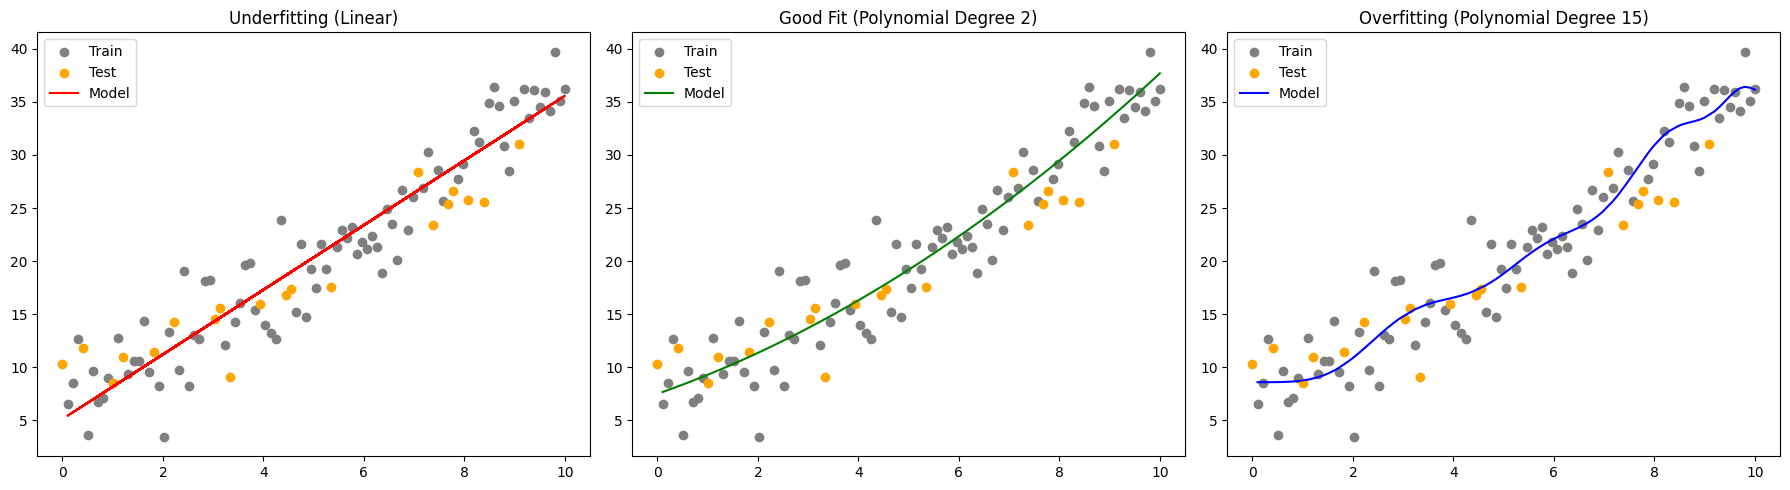

MSE - Underfitting (Linear) - Train: 8.955340788511009
MSE - Underfitting (Linear) - Test : 10.48315851398471

MSE - Good Fit (Poly Deg 2) - Train: 7.8441103506375125
MSE - Good Fit (Poly Deg 2) - Test : 7.782838411951232

MSE - Overfitting (Poly Deg 15) - Train: 7.4182817935316905
MSE - Overfitting (Poly Deg 15) - Test : 10.351311279545637


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Generate synthetic data
np.random.seed(0)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 3 * X.flatten() + 5 + np.random.normal(0, 3, size=100)

# Split data into 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ========== UNDERFITTING (Linear Regression) ==========
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_train_pred_linear = linear_model.predict(X_train)
y_test_pred_linear = linear_model.predict(X_test)

# ========== GOOD FIT (Polynomial Degree 2) ==========
poly2 = PolynomialFeatures(degree=2)
X_train_poly2 = poly2.fit_transform(X_train)
X_test_poly2 = poly2.transform(X_test)

good_model = LinearRegression()
good_model.fit(X_train_poly2, y_train)
y_train_pred_good = good_model.predict(X_train_poly2)
y_test_pred_good = good_model.predict(X_test_poly2)

# ========== OVERFITTING (Polynomial Degree 15) ==========
poly15 = PolynomialFeatures(degree=15)
X_train_poly15 = poly15.fit_transform(X_train)
X_test_poly15 = poly15.transform(X_test)

overfit_model = LinearRegression()
overfit_model.fit(X_train_poly15, y_train)
y_train_pred_overfit = overfit_model.predict(X_train_poly15)
y_test_pred_overfit = overfit_model.predict(X_test_poly15)

# ========== PLOTS ==========
plt.figure(figsize=(18, 5))

# Underfitting
plt.subplot(1, 3, 1)
plt.scatter(X_train, y_train, color='gray', label='Train')
plt.scatter(X_test, y_test, color='orange', label='Test')
plt.plot(X_train, y_train_pred_linear, color='red', label='Model')
plt.title("Underfitting (Linear)")
plt.legend()

# Good Fit
plt.subplot(1, 3, 2)
plt.scatter(X_train, y_train, color='gray', label='Train')
plt.scatter(X_test, y_test, color='orange', label='Test')
plt.plot(np.sort(X_train[:, 0]), 
         good_model.predict(poly2.transform(np.sort(X_train, axis=0))), 
         color='green', label='Model')
plt.title("Good Fit (Polynomial Degree 2)")
plt.legend()

# Overfitting
plt.subplot(1, 3, 3)
plt.scatter(X_train, y_train, color='gray', label='Train')
plt.scatter(X_test, y_test, color='orange', label='Test')
plt.plot(np.sort(X_train[:, 0]), 
         overfit_model.predict(poly15.transform(np.sort(X_train, axis=0))), 
         color='blue', label='Model')
plt.title("Overfitting (Polynomial Degree 15)")
plt.legend()

plt.tight_layout()
plt.show()

# ========== MSE ==========
print("MSE - Underfitting (Linear) - Train:", mean_squared_error(y_train, y_train_pred_linear))
print("MSE - Underfitting (Linear) - Test :", mean_squared_error(y_test, y_test_pred_linear))

print("\nMSE - Good Fit (Poly Deg 2) - Train:", mean_squared_error(y_train, y_train_pred_good))
print("MSE - Good Fit (Poly Deg 2) - Test :", mean_squared_error(y_test, y_test_pred_good))

print("\nMSE - Overfitting (Poly Deg 15) - Train:", mean_squared_error(y_train, y_train_pred_overfit))
print("MSE - Overfitting (Poly Deg 15) - Test :", mean_squared_error(y_test, y_test_pred_overfit))


In [ ]:
'''
Linear Regression using Ordinary Least Squares (OLS):

Ordinary Least Squares (OLS) is a method used to estimate the parameters of a 
linear regression model by minimizing the sum of squared residuals (the differences between observed and predicted values).


Formuka of OLS:

S(β) = Σ(y_i - (β_0 + β_1*x_i))^2/n
Where:
- S(β) is the sum of squared residuals (cost function)
- y_i is the actual target value for the i-th example
- β_0 is the y-intercept (bias term)
- β_1 is the coefficient (weight) for the feature x_i
- n is the number of training examples
- The goal is to find the values of β_0 and β_1 that minimize S

Final value for β_0 and β_1:
β_0 = y_mean - β_1*x_mean
β_1 = Σ(y_i - y_mean) / Σ(x_i - x_mean)

Where:
- y_mean is the mean of the actual target values
- x_mean is the mean of the input feature values

'''

In [ ]:
'''
OLS vs Linear Regression (sklearn):
OLS (Ordinary Least Squares) and Linear Regression (as implemented in libraries like scikit-learn) are both methods for fitting a linear model to data, 
but they differ in their implementation and usage.
OLS:
- OLS is a statistical method that estimates the parameters of a linear regression model by minimizing the sum of squared residuals (the differences between observed and predicted values).
- It provides a closed-form solution for the coefficients (weights) of the linear model.
- OLS can be implemented manually using matrix operations or using libraries like NumPy.
- OLS is often used in statistical analysis and econometrics to derive the best-fitting line for a given dataset.
- It is suitable for small to medium-sized datasets where the closed-form solution can be computed efficiently.

Linear Regression (sklearn):
- Linear Regression in scikit-learn is a high-level implementation of linear regression that provides an easy-to-use interface for fitting linear models.
- It uses OLS under the hood to estimate the coefficients of the linear model.
- It supports various features such as regularization (Ridge and Lasso regression), cross-validation, and hyperparameter tuning.
- It is optimized for performance and can handle larger datasets efficiently.
'''